# Exploratory Data Analysis
[EDA Githib](https://github.com/miykael/miykael.github.io/blob/master/assets/nb/03_advanced_eda/nb_advanced_eda.ipynb)  
[4 pandas functions](https://link.medium.com/8c94hIK89nb)  
[data engineering code snippets](https://link.medium.com/vF17WXqgbob)

In [1]:
from sklearn.datasets import fetch_openml
# Download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)

# Extract feature matrix X and show 5 random samples
df_x = dataset['frame']
df_x.sample(5)

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
122078,2015132C90251,1.0,9.0,0.0,9.0,0.0,6.0,0.0,0.0,0.0,...,4.0,3.0,0.0,0.0,2.0,0.0,0.0,9.0,1.0,2.0
286196,2015460264535,1.0,9.0,0.0,9.0,0.0,6.0,0.0,0.0,0.0,...,6.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,7.0
232154,201542I112404,2.0,9.0,0.0,4.0,0.0,8.0,0.0,0.0,0.0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,4.0
85982,2015075038042,3.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,10.0
264309,2015450022048,2.0,1.0,0.0,17.0,0.0,1.0,0.0,0.0,0.0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0


In [2]:
import matplotlib.pyplot as plt  
plt.style.use('dark_background')

## Structure Investigation

In [3]:
# show size of the dataset
df_x.shape

(363243, 67)

In [4]:
import pandas as pd
# Count how many times each data type is present
pd.value_counts(df_x.dtypes)

float64    61
object      6
dtype: int64

In [5]:
# Display non-numeric types
df_x.select_dtypes(exclude='number').head()

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,1.0,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,1.0,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,1.0,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,1.0,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,1.0,09/01/2015,07:30,E09000020,E01002814


In [6]:
df_x.Sex_of_Driver = df_x.Sex_of_Driver.astype('float')

In [7]:
df_x.describe(exclude='number')

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,319866,319822,319866,298758
unique,140056,365,1439,204,25979
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2972,8457,1456


<AxesSubplot:title={'center':'Unique values per feature'}>

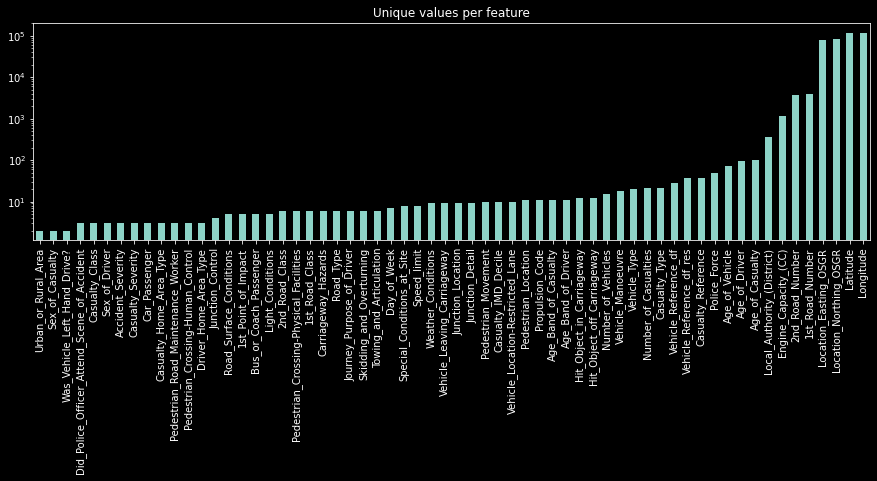

In [8]:
# For each numerical feature compute number of unique entries
unique_values = df_x.select_dtypes(include="number").nunique().sort_values()
# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

In [9]:
df_x.info()
df_x.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363243 entries, 0 to 363242
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               363243 non-null  object 
 1   Vehicle_Reference_df_res                     363243 non-null  float64
 2   Vehicle_Type                                 363181 non-null  float64
 3   Towing_and_Articulation                      362864 non-null  float64
 4   Vehicle_Manoeuvre                            363059 non-null  float64
 5   Vehicle_Location-Restricted_Lane             363067 non-null  float64
 6   Junction_Location                            363159 non-null  float64
 7   Skidding_and_Overturning                     363067 non-null  float64
 8   Hit_Object_in_Carriageway                    363080 non-null  float64
 9   Vehicle_Leaving_Carriageway                  363084 non-nul

,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,363243.000000,363181.000000,362864.000000,363059.000000,363067.000000,363159.000000,363067.000000,363080.000000,363084.000000,363242.000000,...,357674.000000,363243.000000,363241.000000,363241.000000,362481.000000,363197.000000,363077.000000,363243.000000,323448.000000,293666.000000
mean,1.696203,9.756953,0.029766,12.607326,0.109233,2.609361,0.188139,0.307480,0.366689,0.546699,...,6.431284,2.875725,0.380731,0.276467,0.281027,0.066127,0.032833,7.840080,1.308186,5.107323
std,1.487094,8.315189,0.294127,6.218689,0.903131,3.249245,0.714243,1.595551,1.374107,2.094845,...,2.157860,0.355195,1.522220,1.294574,0.591239,0.493174,0.253780,7.366436,0.657776,2.829458
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,9.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,3.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,5.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,37.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


## Quality Investigation

In [10]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df_x.drop(labels=["Accident_Index"], axis=1).duplicated().sum() # drop the first column
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 22 duplicates in your database.


In [11]:
columns_to_consider = df_x.drop(labels=['Accident_Index'], axis=1).columns

In [12]:
# Drop duplicates based on 'columns_to_consider'
df_X = df_x.drop_duplicates(subset=columns_to_consider)
df_X.shape

(363221, 67)

Text(0, 0.5, 'Sample Number')

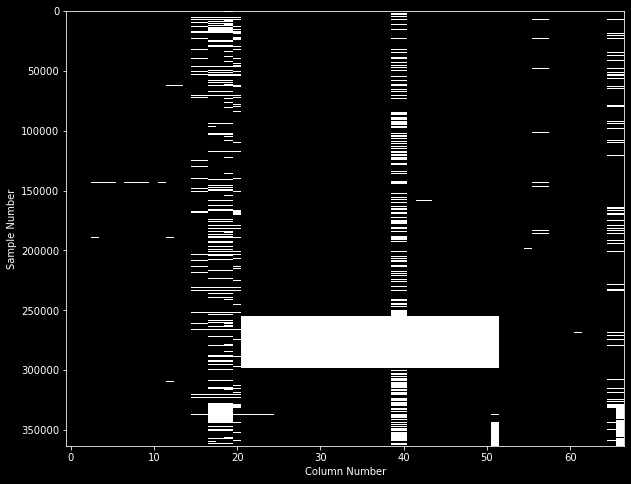

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

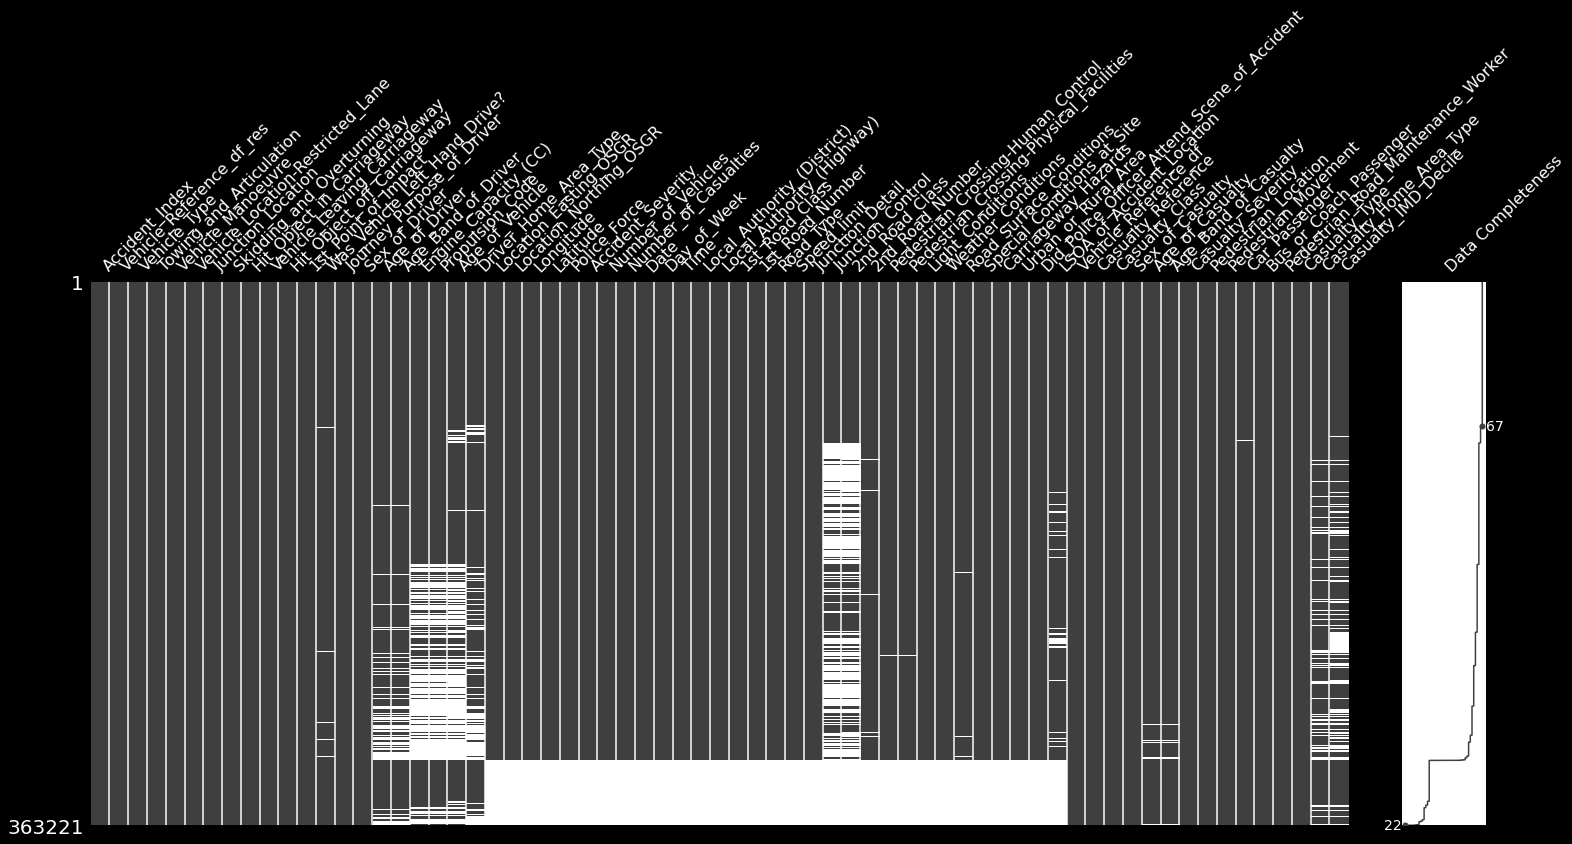

In [14]:
import missingno as msno

msno.matrix(df_X, labels=True, sort="descending");

In [15]:
# remove samples that have more than 20% of missing values. 
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True) #thresh parameter decides the min number of non-NAN values needed in a row not to drop
df_X.shape

(319790, 67)

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

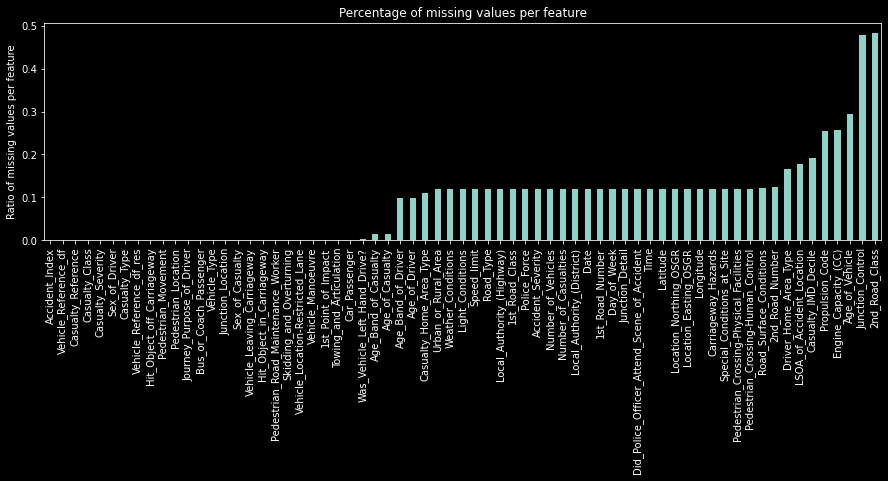

In [16]:
df_x.isna().mean().sort_values().plot( # the mean gets the percent of missing values
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

In [17]:
# remove any feature with more than 15% of missing values
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1) # thresh parameter decides the min number of non-NAN values needed in a row not to drop
df_X.shape

(319790, 60)

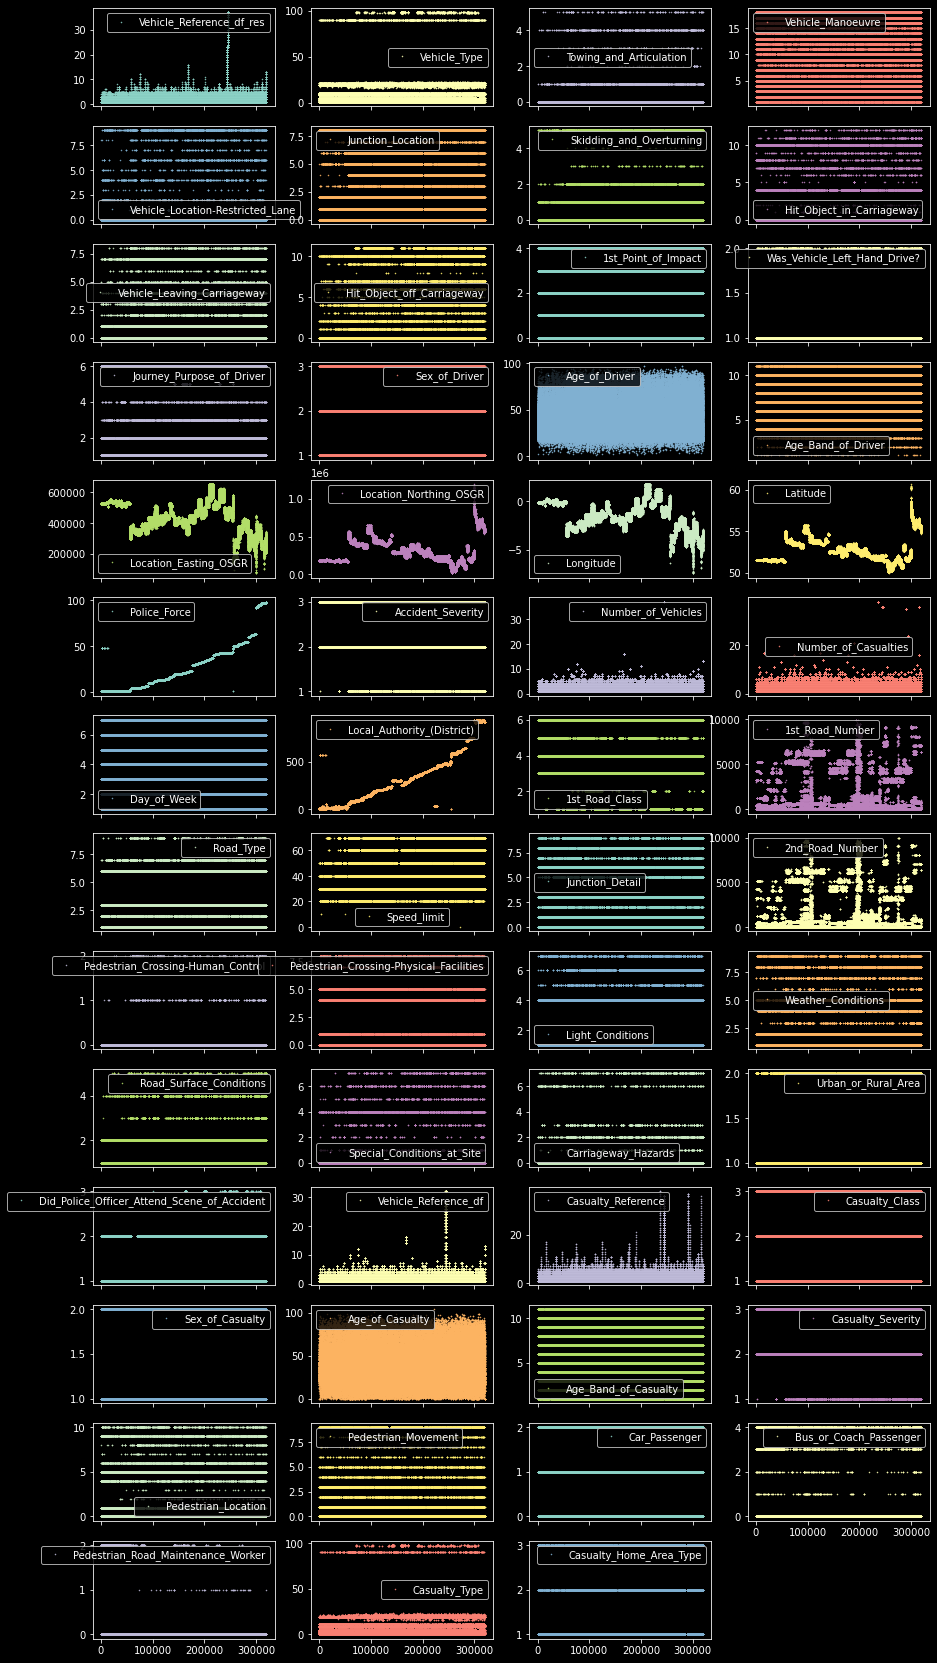

In [18]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

In [19]:
# Extract descriptive properties of non-numerical features
df_X.describe(exclude=["number", "datetime"])

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,319790,319790,319746,319790,298693
unique,123645,365,1439,204,25977
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2969,8457,1456


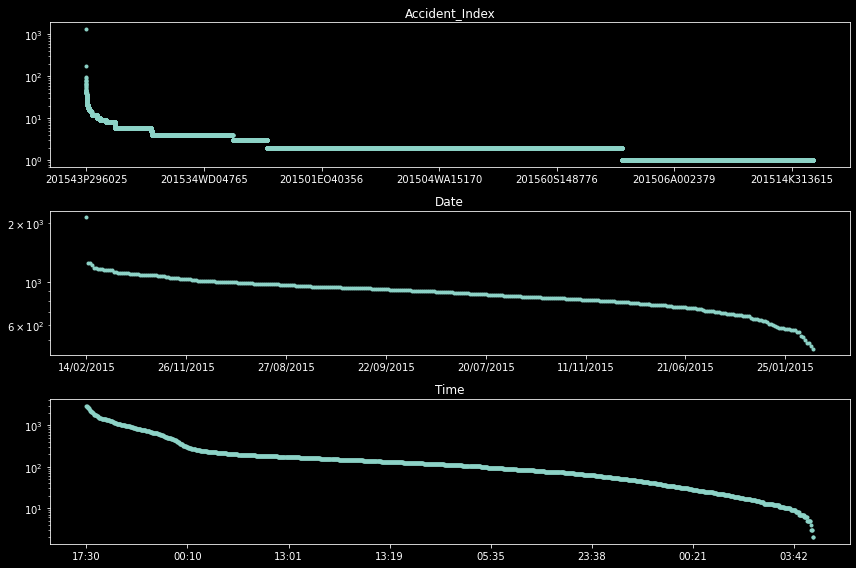

In [20]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout()

In [21]:
# Collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index # creates a series and grabs the index
accident_ids

Index(['201543P296025', '2015621500156', '201597AC70404', '2015984141415',
       '201522D501706', '201501RY10259', '201542I309809', '2015160C06511',
       '20154100T3095', '2015300013662'],
      dtype='object')

In [22]:
# Removes accidents from the 'accident_ids' list
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape

(317665, 60)

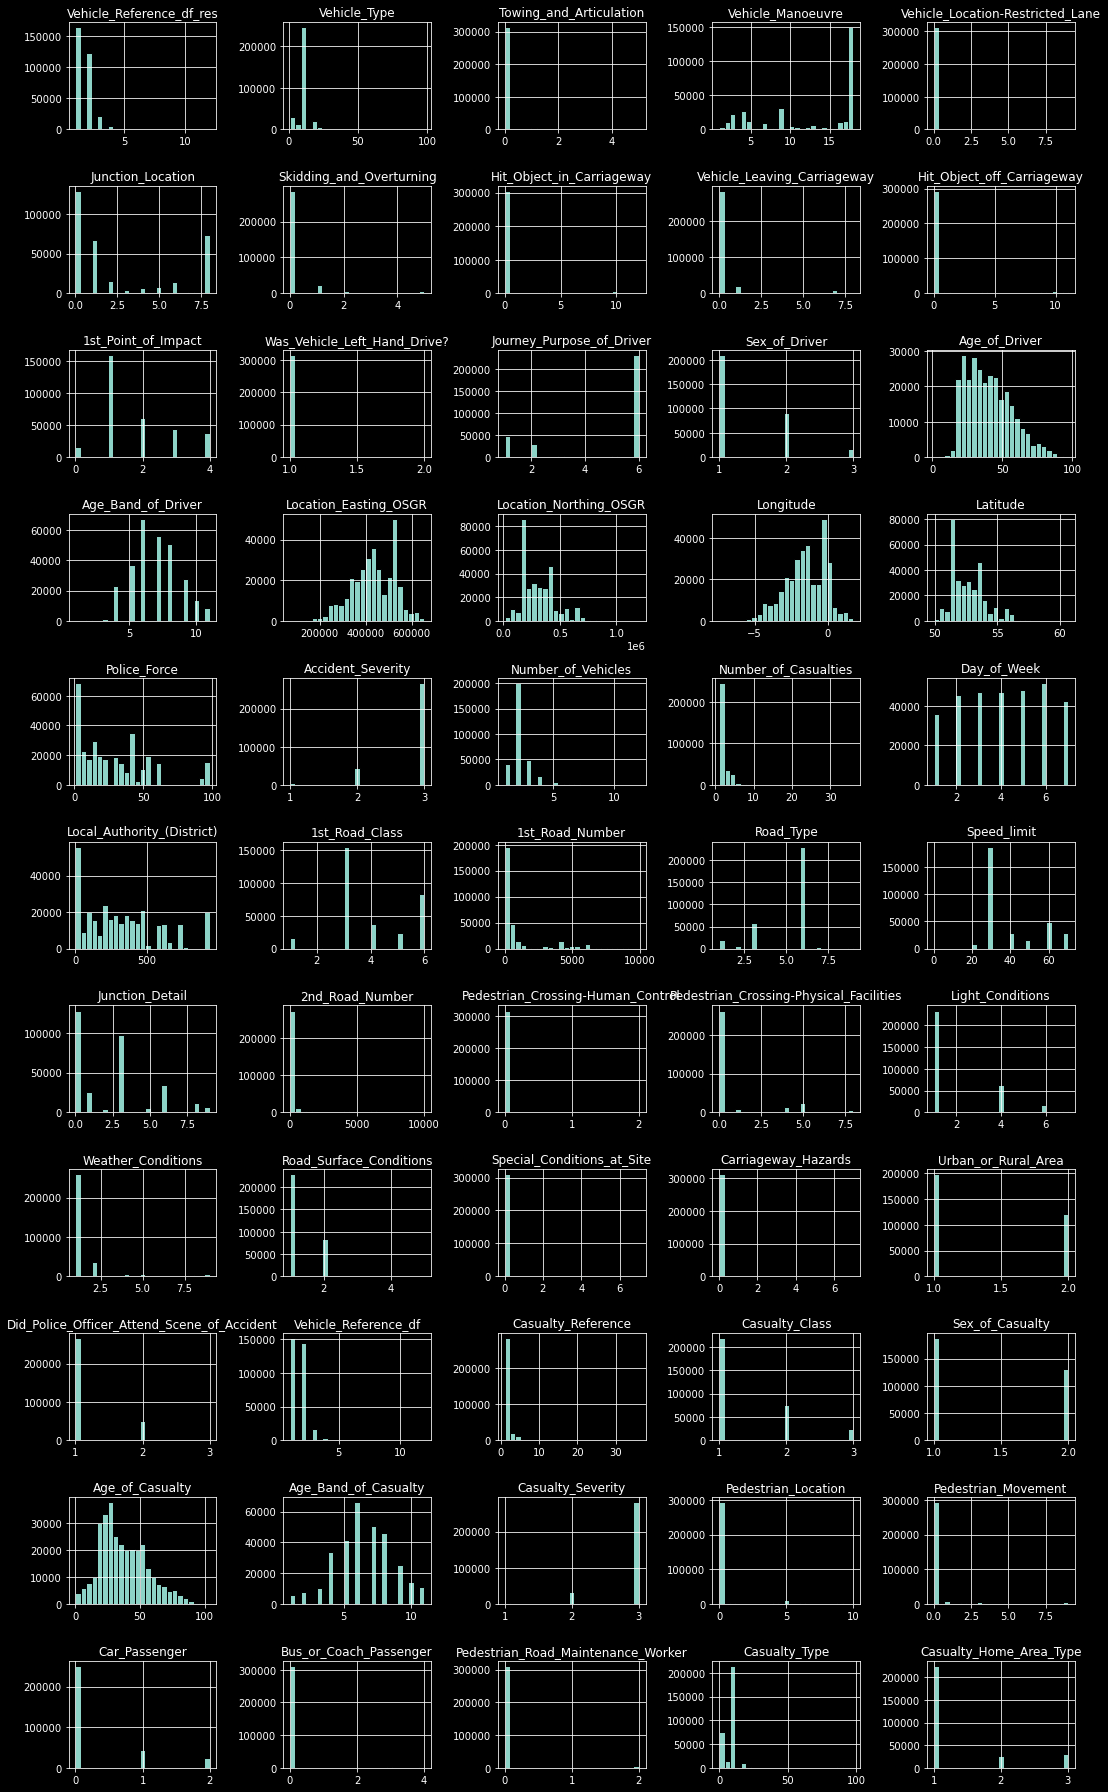

In [23]:
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

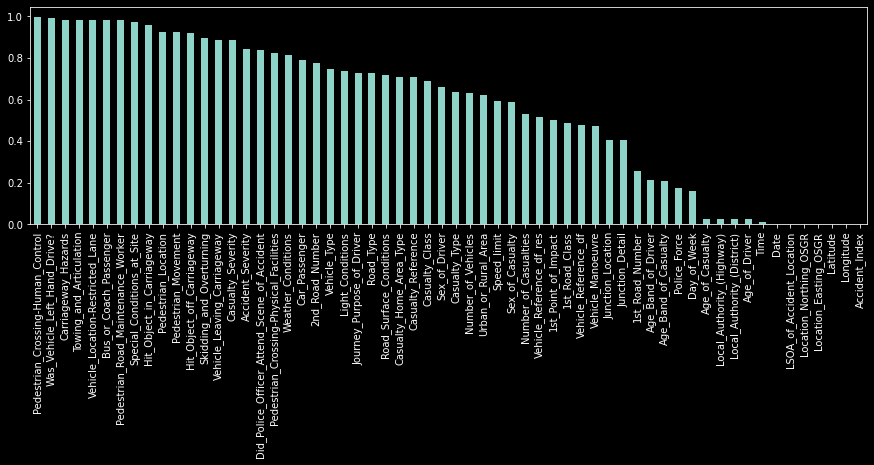

In [38]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()
# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1) # get equal to for a dataframe, returns a boolean dataframe. axis=1 means we are comparing a SEries to each column to see if it is the mode
# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4))


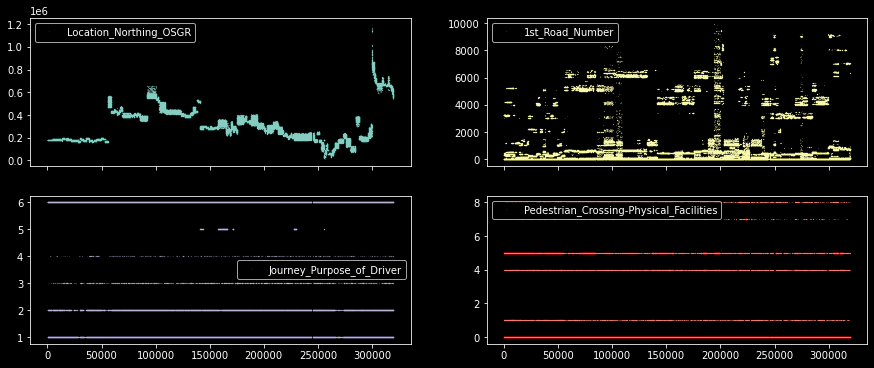

In [39]:
df_X[["Location_Northing_OSGR", "1st_Road_Number",
      "Journey_Purpose_of_Driver", "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1, figsize=(15, 6))


In [43]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25 # returns a boolean Series


In [44]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_X[cols_continuous[cols_continuous].index] # uses the boolean Series to subset. Grabs the index of the boolean to subset the df_X dataframe
df_continuous.shape

(317665, 11)

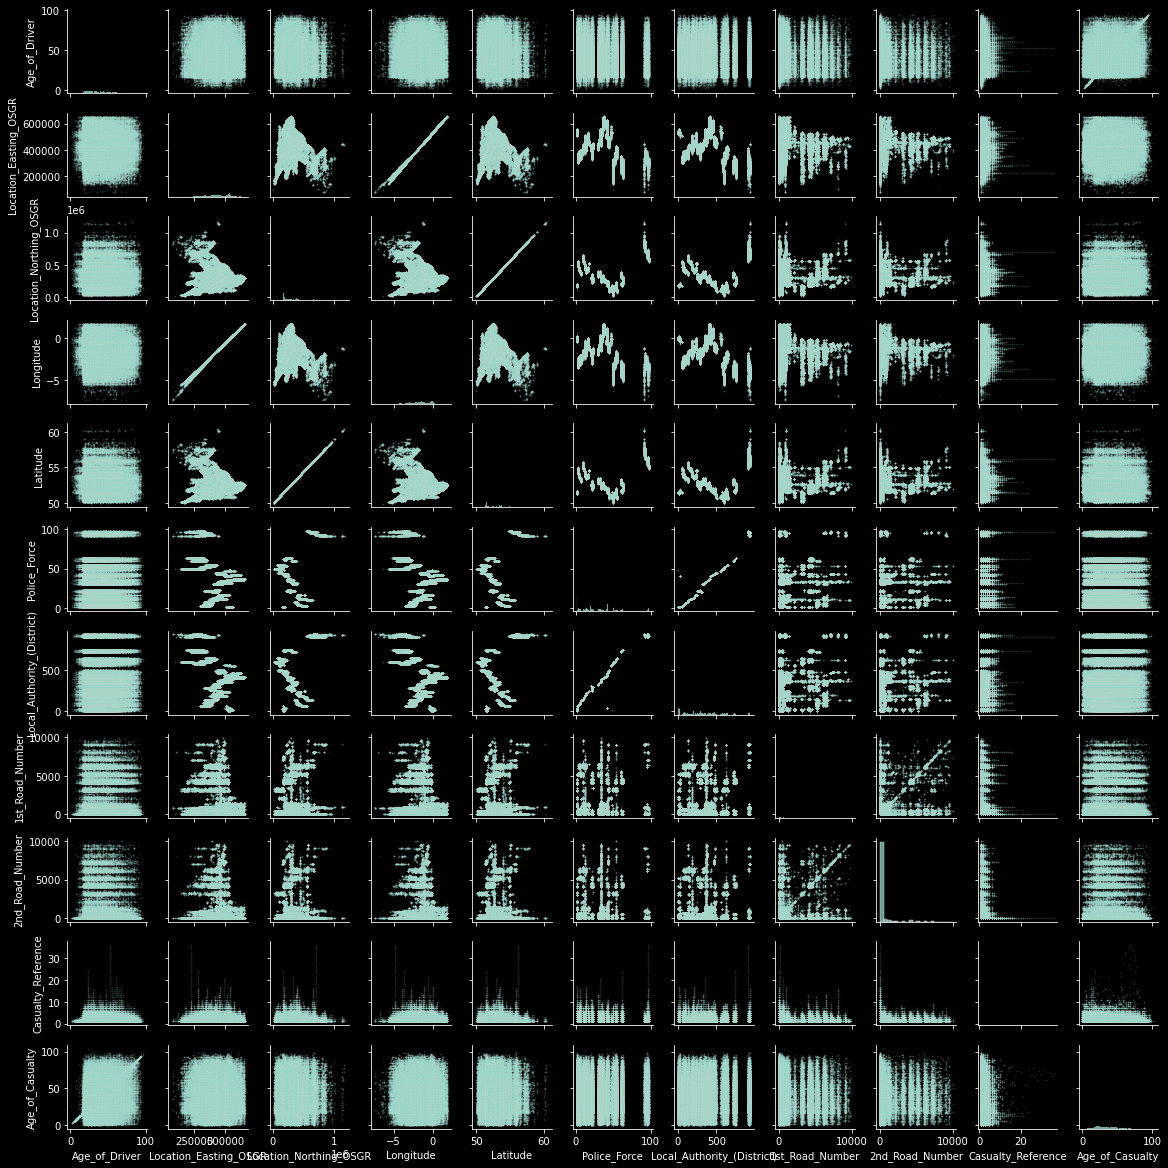

In [45]:
import seaborn as sns

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

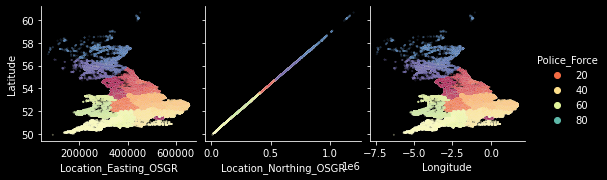

In [46]:
sns.pairplot(
    df_X, plot_kws={"s": 3, "alpha": 0.2}, hue="Police_Force", palette="Spectral",
    x_vars=["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude"],
    y_vars="Latitude")

In [47]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df_X[cols_continuous[~cols_continuous].index]
df_discrete.shape

(317665, 44)

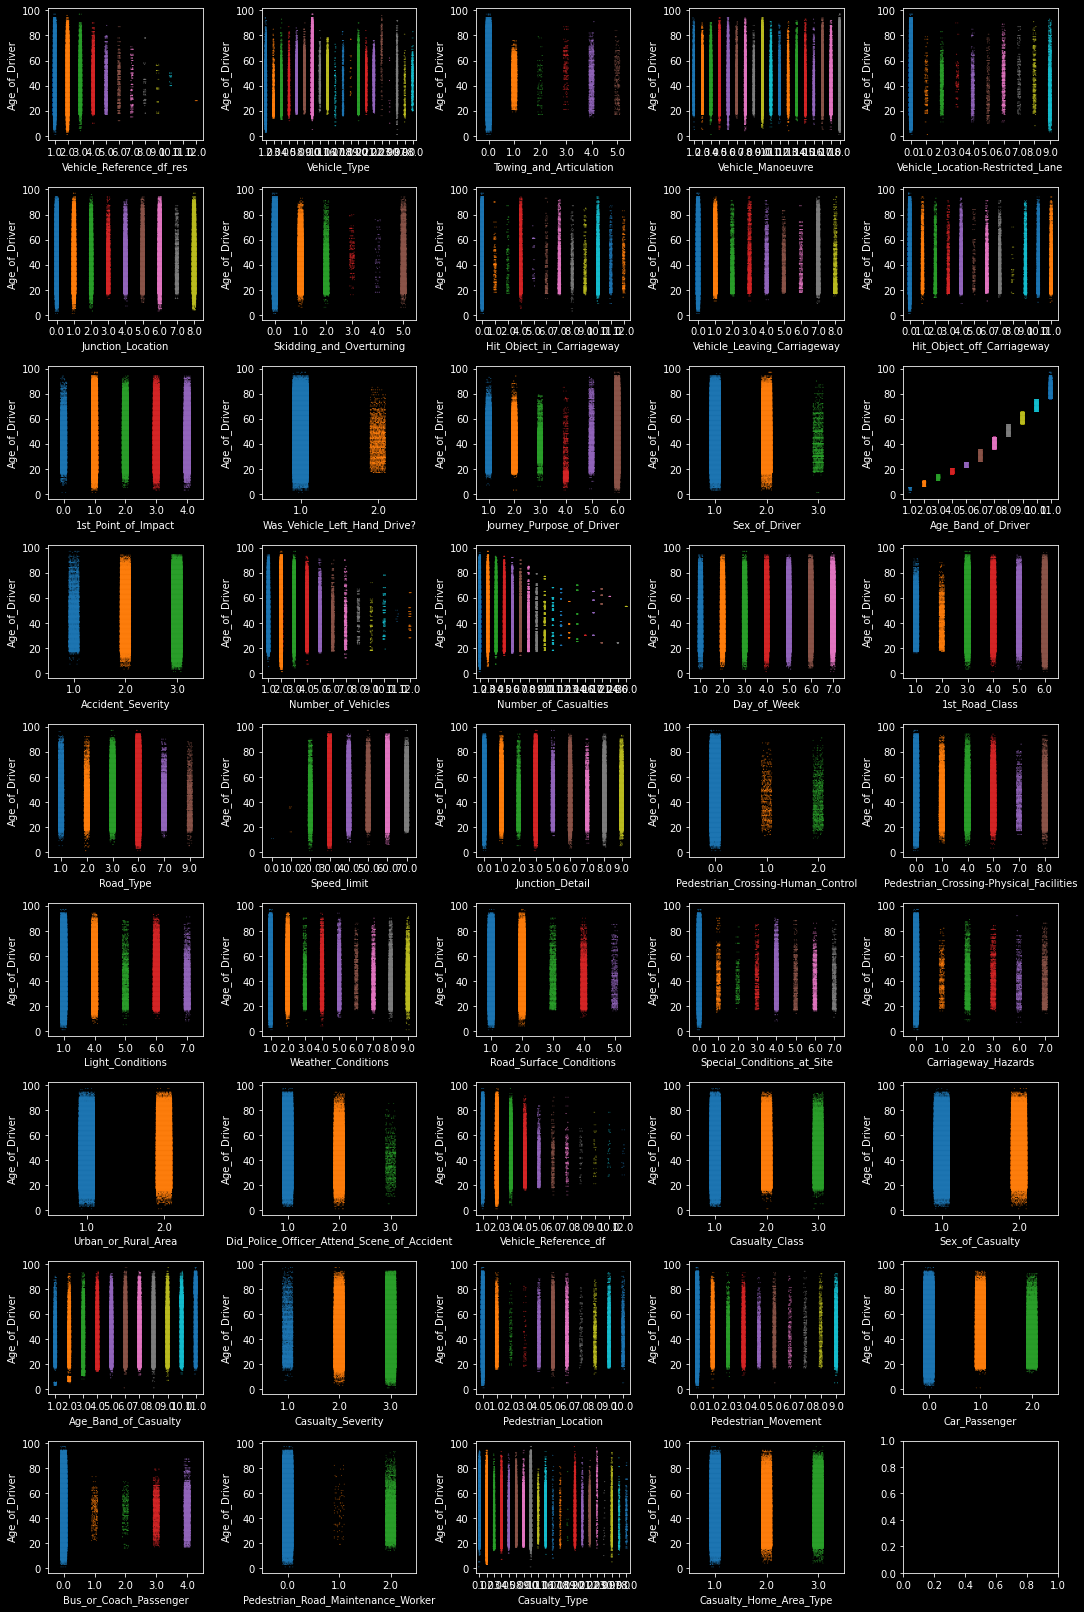

In [55]:
import numpy as np

# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int") # ceil returns the ceiling of the input, element-wise. 44/5 ==8.8. Ceiling = 9
# Specify y_value to spread data (ideally a continuous feature)
y_value = df_X["Age_of_Driver"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))
# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout();# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout()

NameError: name 'unzip' is not defined

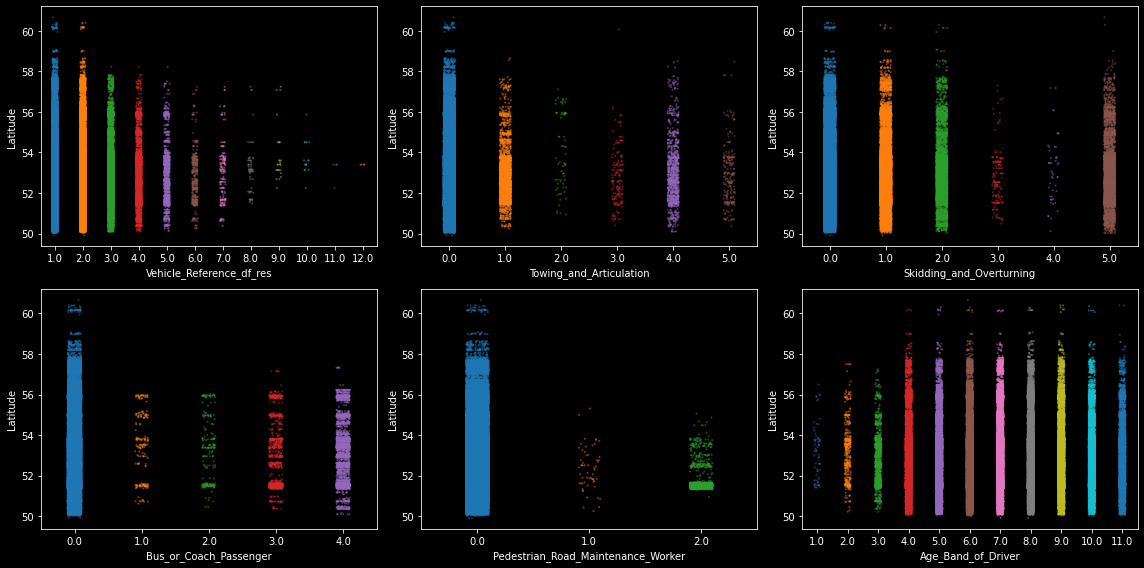

In [61]:

# Specify features of interest
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout()

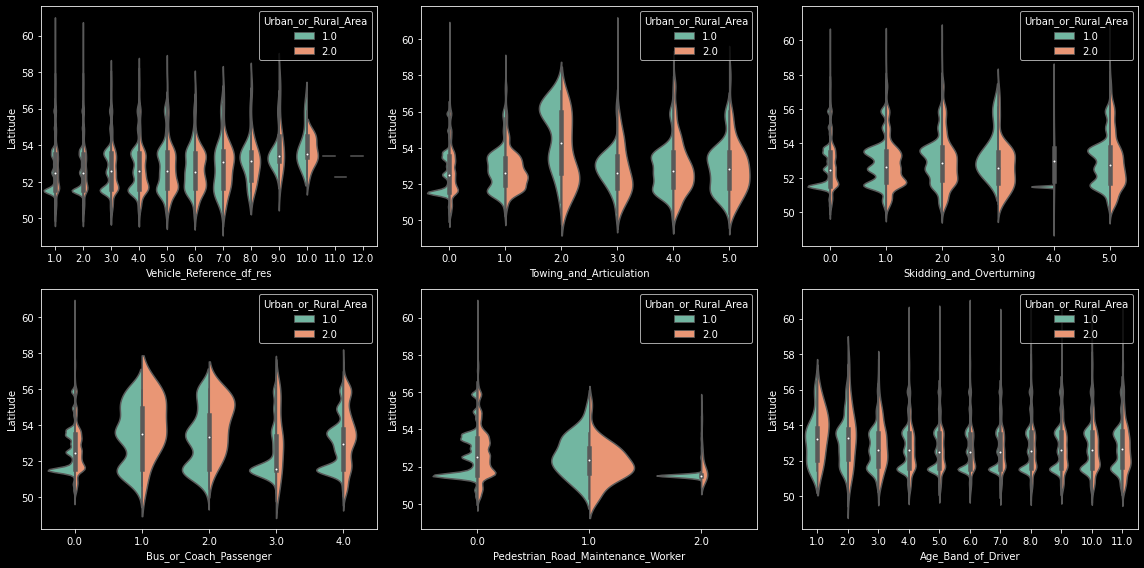

In [63]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df_X, x=col, y=df_X["Latitude"], palette="Set2",
                   split=True, hue="Urban_or_Rural_Area", ax=ax)
plt.tight_layout()


In [64]:
# Computes feature correlation
df_corr = df_X.corr(method="pearson")

<AxesSubplot:>

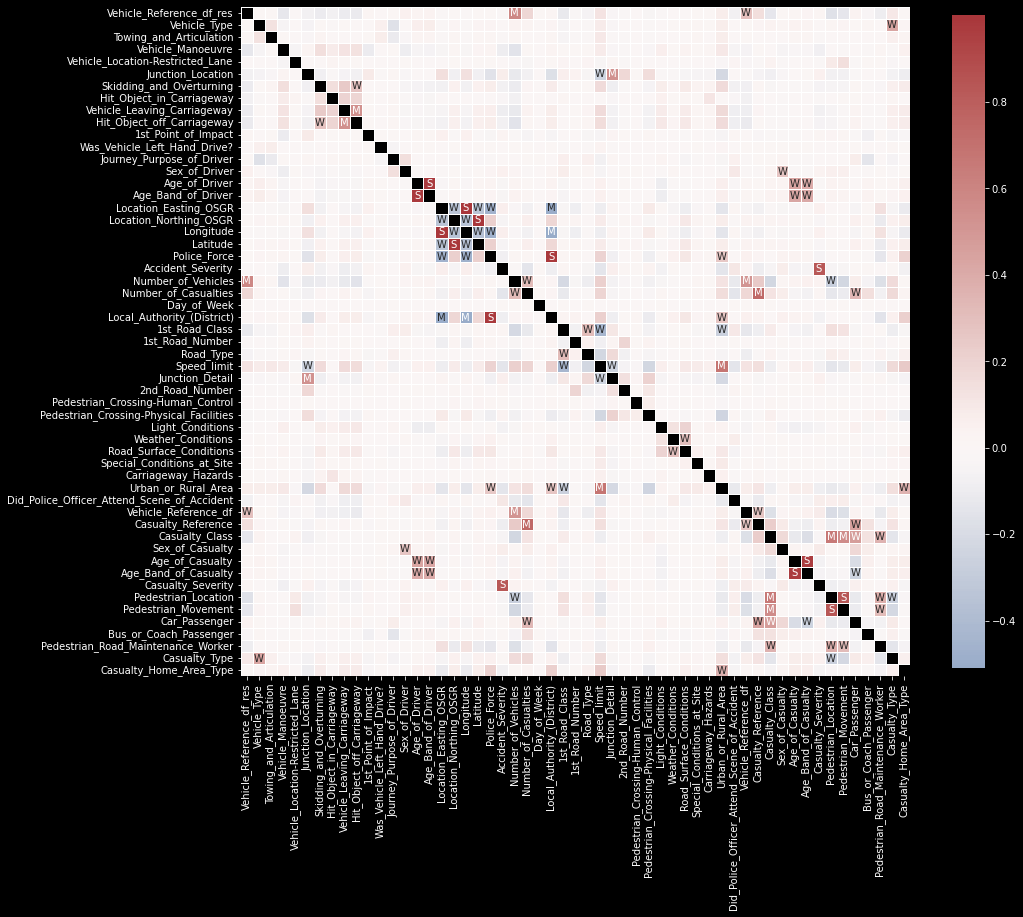

In [65]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,  # eye Return a 2-D array with ones on the diagonal and zeros elsewhere
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

In [66]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool") # tril returns Lower triangle of an array.

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()


Local_Authority_(District)  Longitude                -0.509343
                            Location_Easting_OSGR    -0.502919
Police_Force                Longitude                -0.471327
                            Location_Easting_OSGR    -0.461112
Speed_limit                 1st_Road_Class           -0.438931
                                                        ...   
Age_Band_of_Casualty        Age_of_Casualty           0.974397
Age_Band_of_Driver          Age_of_Driver             0.979019
Local_Authority_(District)  Police_Force              0.984819
Longitude                   Location_Easting_OSGR     0.999363
Latitude                    Location_Northing_OSGR    0.999974
Length: 1485, dtype: float64

# Four Panda Functions
[medium article](https://towardsdatascience.com/four-functions-to-level-up-your-pandas-skills-c89f95a1773a).  

In [68]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Assign Function

In [69]:

# assign allows us to assign columsn to a DataFrame
grouped = (
    data.groupby("species")
    .agg(["mean"])
    .assign(
        fancy_column=lambda df: df["sepal_width"]["mean"]
        / df["sepal_width"]["mean"].mean(),
        useless_column="I am useless"
    )
)
grouped

,sepal_length,sepal_width,petal_length,petal_width,fancy_column,useless_column
,mean,mean,mean,mean,,
species,,,,,,
setosa,5.006,3.428,1.462,0.246,1.121239,I am useless
versicolor,5.936,2.770,4.260,1.326,0.906018,I am useless
virginica,6.588,2.974,5.552,2.026,0.972743,I am useless


### Map Function
applymap function allows us to do element-wise operations on an entire DataFrame instead of a Series

In [77]:
import pandas as pd
data = pd.read_csv(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
).assign(
    to_big_to_small=lambda df: (df.sepal_width > 3).map({True: "Too Big", False: "Perfect"}),
    inverted_name=lambda df: df.species.map(lambda name: name[::-1]),
)
data

,sepal_length,sepal_width,petal_length,petal_width,species,to_big_to_small,inverted_name
0,5.1,3.5,1.4,0.2,setosa,Too Big,asotes
1,4.9,3.0,1.4,0.2,setosa,Perfect,asotes
2,4.7,3.2,1.3,0.2,setosa,Too Big,asotes
3,4.6,3.1,1.5,0.2,setosa,Too Big,asotes
4,5.0,3.6,1.4,0.2,setosa,Too Big,asotes
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,Perfect,acinigriv
146,6.3,2.5,5.0,1.9,virginica,Perfect,acinigriv
147,6.5,3.0,5.2,2.0,virginica,Perfect,acinigriv
148,6.2,3.4,5.4,2.3,virginica,Too Big,acinigriv


In [76]:
pd.Series(range(3)).map({1:'medium', 2:'high'})

0       NaN
1    medium
2      high
dtype: object

### Query
extracting data from dataframes

In [80]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
length_th = 0.5
filtered_data = (data
    .assign(**{"PW Squared": data["petal_width"] ** 2})
    .query("`PW Squared` > 0.4 and petal_length > @length_th and species != 'setosa'")
)
filtered_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PW Squared
50,7.0,3.2,4.7,1.4,versicolor,1.96
51,6.4,3.2,4.5,1.5,versicolor,2.25
52,6.9,3.1,4.9,1.5,versicolor,2.25
53,5.5,2.3,4.0,1.3,versicolor,1.69
54,6.5,2.8,4.6,1.5,versicolor,2.25


### Explode
The explodefunction is useful when entries of a column are list-like. Concretely, it enables you to create a new row per entry of these lists. When doing this, all other entries of a row will be replicated, also the index. You invoke it by passing the name of the column that contains the list-like objects. As always, let’s use an example to make that more tangible

In [82]:

import pandas as pd
n_rows = 3
result = pd.DataFrame(
    {"a": [list(range(1 + i ** 2)) for i in range(n_rows)], "b": list(range(n_rows))}
)
result # column a is a column of lists

,a,b
0,[0],0
1,"[0, 1]",1
2,"[0, 1, 2, 3, 4]",2


In [83]:
result.explode("a").astype({'a':int}) # explodes out the colunm of lists


,a,b
0,0,0
1,0,1
1,1,1
2,0,2
2,1,2
2,2,2
2,3,2
2,4,2
